<a href="https://colab.research.google.com/github/denverkim/DATA_MINING/blob/main/LAB10_CLASS_MON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 생성 (슬라이드 7)
input_data = np.array([[3, -1.5, 3, -6.4],
                       [0, 3, -1.3, 4.1],
                       [1, 2.3, -2.9, -4.3]])

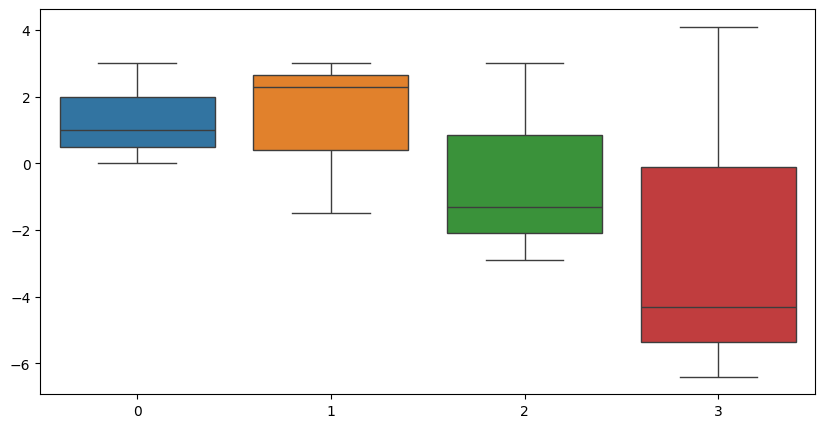

In [4]:
# 스케일링전 분포
plt.figure(figsize=(10, 5))
sns.boxplot(data=input_data)
plt.show()

In [3]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(input_data)
scaled_data = scaler.transform(input_data)
print(scaled_data)

[[1.         0.         1.         0.        ]
 [0.         1.         0.27118644 1.        ]
 [0.33333333 0.84444444 0.         0.2       ]]


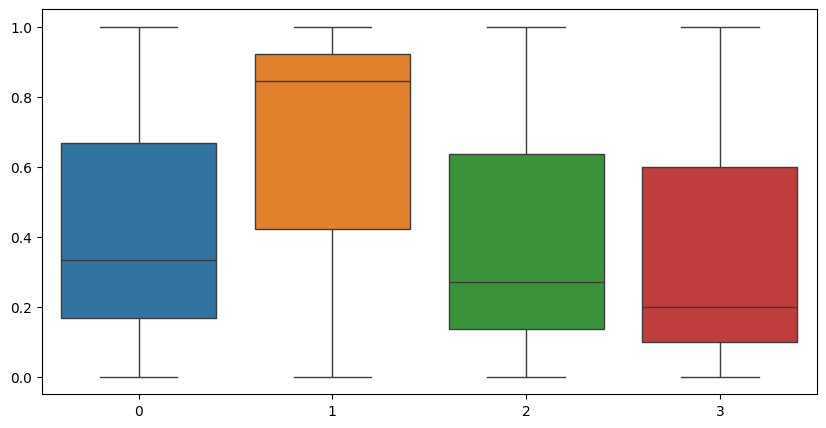

In [5]:
# 스케일링후 분포
plt.figure(figsize=(10, 5))
sns.boxplot(data=scaled_data)
plt.show()

In [6]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(input_data)
scaled_data = scaler.transform(input_data)
print(scaled_data)

[[ 1.33630621 -1.39936232  1.36473933 -0.9258201 ]
 [-1.06904497  0.87670892 -0.36125453  1.38873015]
 [-0.26726124  0.5226534  -1.0034848  -0.46291005]]


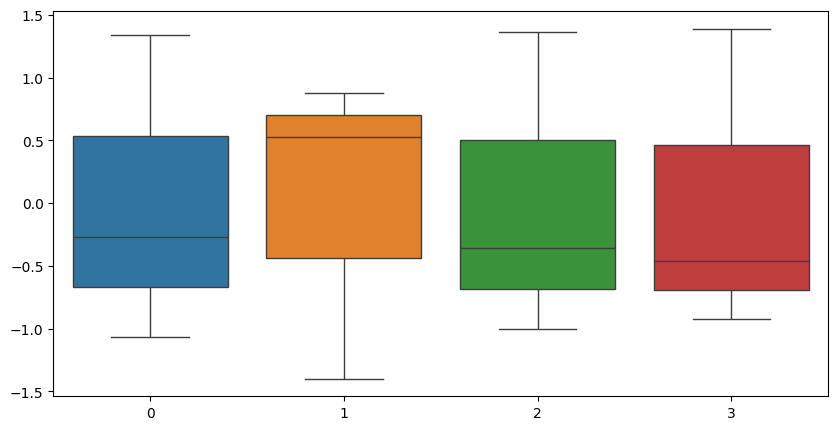

In [7]:
# 표준스케일링후 박스플랏
plt.figure(figsize=(10, 5))
sns.boxplot(data=scaled_data)
plt.show()

# PIMA INDIAN DATASET

In [36]:
# 피마 데이터셋 생성
df = pd.read_csv('/content/pima-indians-diabetes.csv', header=None)
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [37]:
# 컬럼이름 변경
df.columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [38]:
# x and y split
y = df['class']
x = df.drop('class', axis=1)

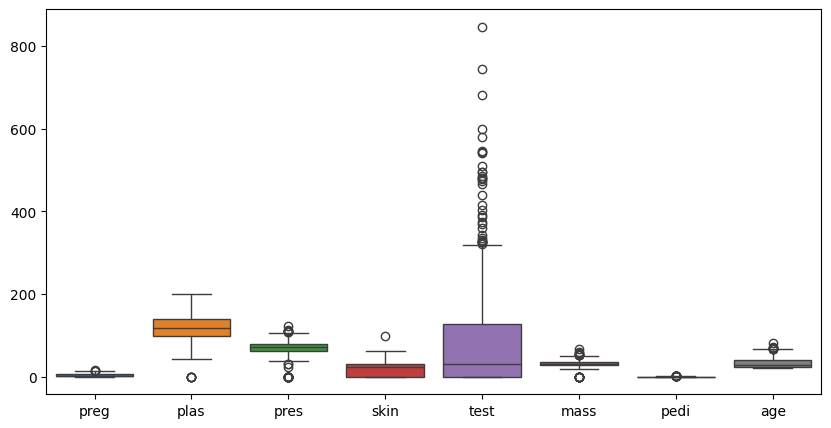

In [39]:
# 정규화전 분포
plt.figure(figsize=(10, 5))
sns.boxplot(data=x)
plt.show()

In [40]:
# 정규화 scale data (between 0 and 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)
print(scaled_data)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


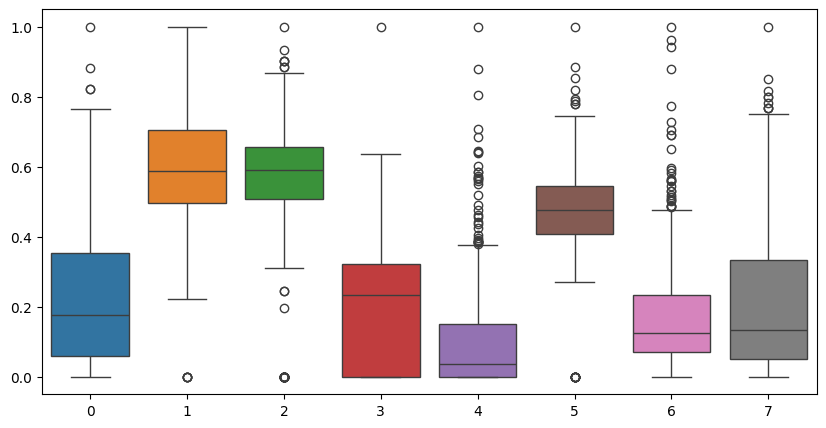

In [41]:
# 정규화 후 분포
plt.figure(figsize=(10, 5))
sns.boxplot(data=scaled_data)
plt.show()

In [42]:
# Splitting Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

In [25]:
y_train

,class
60,0
618,1
346,0
294,0
231,1
...,...
71,0
106,0
270,1
435,1


In [43]:
# Resampling using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

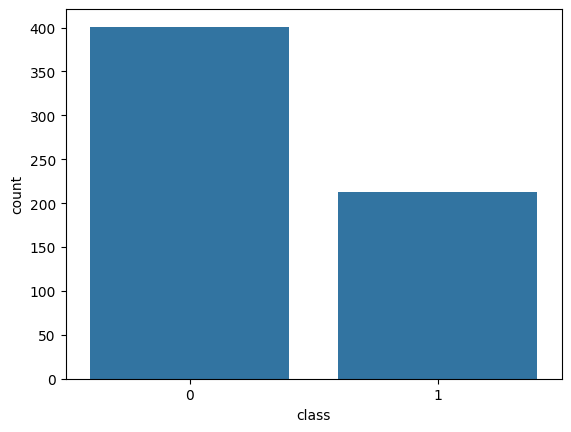

In [44]:
# Resample 전 y_train 확인
y_train = pd.DataFrame(y_train)
sns.countplot(data=y_train, x='class')
plt.show()

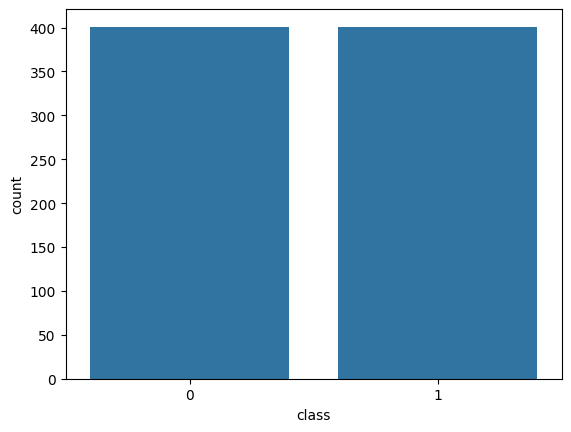

In [45]:
# Resample 후 y_train 확인
y_train_resampled = pd.DataFrame(y_train_resampled)
sns.countplot(data=y_train_resampled, x='class')
plt.show()

In [47]:
# DT, RF, LDA, KNN, SVM 모델구축
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 모델 생성
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier()
svm = SVC()

# 모델 학습
dt.fit(x_train_resampled, y_train_resampled)
rf.fit(x_train_resampled, y_train_resampled)
lda.fit(x_train_resampled, y_train_resampled)
knn.fit(x_train_resampled, y_train_resampled)
svm.fit(x_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

SVC()

In [63]:
# 교차검증 평균, 표준편차로 평가
from sklearn.model_selection import cross_val_score
models = [dt, rf, lda, knn, svm]
scores_lst = []
for model in models:
    scores = cross_val_score(model, x_train_resampled, list(y_train_resampled['class']), cv=10)
    scores_lst.append(scores)
    print(f"{model.__class__.__name__}: 평균 정확도 {scores.mean():.2f}, 표준편차 {scores.std():.2f}")

DecisionTreeClassifier: 평균 정확도 0.76, 표준편차 0.06
RandomForestClassifier: 평균 정확도 0.84, 표준편차 0.05
LinearDiscriminantAnalysis: 평균 정확도 0.76, 표준편차 0.04
KNeighborsClassifier: 평균 정확도 0.78, 표준편차 0.05
SVC: 평균 정확도 0.78, 표준편차 0.04


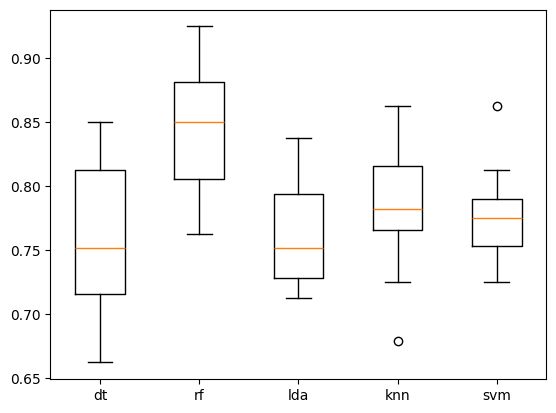

In [69]:
# 교차검증으로 박스플랏
plt.boxplot(scores_lst)
plt.xticks(np.arange(1,6), ["dt", "rf", "lda", "knn", "svm"])
plt.show()

In [76]:
# 테스트 데이터 생성
test_data = pd.DataFrame({
    'preg': 6,
    'plas': 148,
    'pres': 72,
    'skin': 35,
    'test': 0,
    'mass': 33.6,
    'pedi': 0.627,
    'age': 50
}, index=[0])

In [78]:
# 실데이터로 예측
rf.predict(scaler.transform(test_data)) # 당뇨병 환자다

array([1])